# Evaluación 2: simpleplot
Patiy Li Yang

In [63]:
import os, geopandas as gpd

countries = gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
China = countries[countries.COUNTRY=='China']

rivers = gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
China_rivers = gpd.clip(gdf=rivers, mask=China)

cities = gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))
China_cities = cities[cities.COUNTRY=='China']

In [64]:
#Ignorar errores 
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

## CRS para China: 3415
Fuente: [epsg.io](https://epsg.io/?q=china+kind%3APROJCRS)

In [65]:
China3415 = China.to_crs(3415)
China_rivers3415 = China_rivers.to_crs(China3415.crs)
China_cities3415 = China_cities.to_crs(China3415.crs)

# Unidad de distancia en metros:
China_rivers3415.crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [66]:
China3415.centroid

41    POINT (-451290.166 2334683.574)
dtype: geometry

## Mapas proyectados

### a) Mapas individuales

<Axes: >

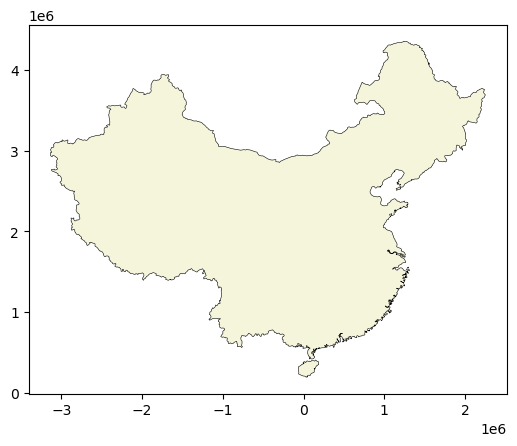

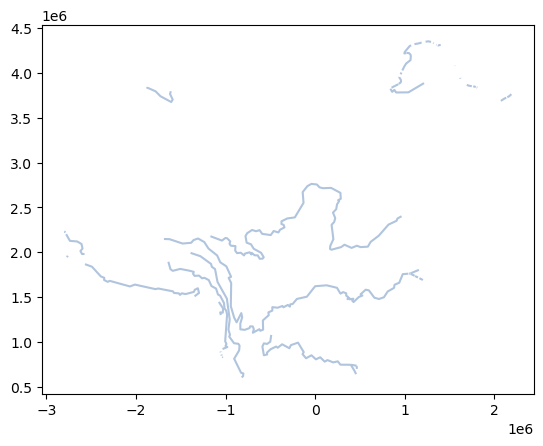

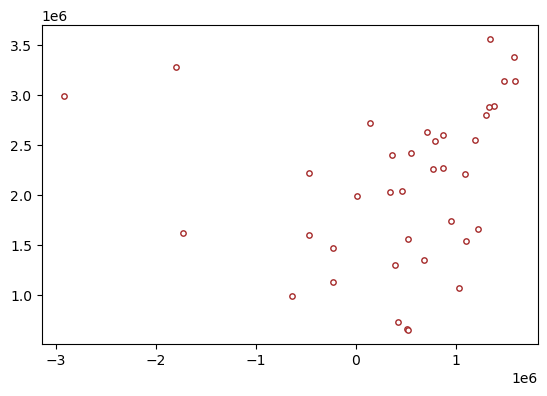

In [67]:
China3415.plot(facecolor="beige", edgecolor='black', linewidth=0.4) 
China_rivers3415.plot(edgecolor='lightsteelblue', linewidth=1.5), 
China_cities3415.plot(marker='o', color='white',edgecolor='brown', markersize=15)

### b) Mapa en conjunto

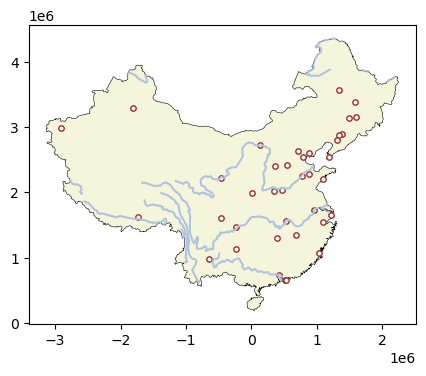

In [68]:
import matplotlib.pyplot as plt

base = China3415.plot(facecolor="beige", edgecolor='black', linewidth=0.4,figsize=(5,5))
China_rivers3415.plot(edgecolor='lightsteelblue', linewidth=1.5,ax=base)
China_cities3415.plot(marker='o', color='white',edgecolor='brown', markersize=15,ax=base)

#Guardar mapa en conjunto como imagen en la carpeta figuras:
plt.savefig(os.path.join("figuras",'China_map.jpg'), dpi=1000)

### c) Mapa en conjunto e interactivo

In [69]:
import folium
m = China_cities3415.explore(color="red", tiles="CartoDB positron" , name="cities")
m = China_rivers3415.explore(m=m, color="royalblue", name="rivers")
folium.LayerControl().add_to(m)
m

## Mapas individuales reproyectados en un archivo geopackage

In [70]:
China3415.to_file(os.path.join("maps","China3415","ChinaMaps_3415.gpkg"), layer='countries', driver="GPKG",index="")
China_rivers3415.to_file(os.path.join("maps","China3415","ChinaMaps_3415.gpkg"), layer='rivers', driver="GPKG",index="")
China_cities3415.to_file(os.path.join("maps","China3415","ChinaMaps_3415.gpkg"), layer='cities', driver="GPKG",index="")

link al archivo: https://github.com/Ciencia-de-datos-espaciales-2023-2/simpleplot/raw/main/maps/China3415/ChinaMaps_3415.gpkg

In [71]:
ChinaMaps_3415 = "https://github.com/Ciencia-de-datos-espaciales-2023-2/simpleplot/raw/main/maps/China3415/ChinaMaps_3415.gpkg"

In [72]:
from  fiona import listlayers

listlayers(ChinaMaps_3415)

['countries', 'rivers', 'cities']